In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.offline import iplot, plot
import warnings

df = pd.read_excel('jobs_in_data.xlsx')
#We display some samples in our data for insuring that we're reqding the right dataset
df.sample(10)
print(f'Number of Rows : {df.shape[0]}\n Number of Columns : {df.shape[1]}')
#df.info()
#Check all of our columns to see if we have NaN or any missing values in our dataset
df.isna().sum()

#Describing numeric data
df.describe().iloc[:,:2]

Number of Rows : 9355
 Number of Columns : 12


,work_year,salary
count,9355.000000,9355.000000
mean,2022.760449,149927.981293
std,0.519470,63608.835387
min,2020.000000,14000.000000
25%,2023.000000,105200.000000
50%,2023.000000,143860.000000
75%,2023.000000,187000.000000
max,2023.000000,450000.000000


## Variables d'entree {work_year,........} Variable de Sortie {Salaire}

# Let's talk about the Dataset
work_year: The year in which the data was recorded. This field indicates the temporal context of the data, important for understanding salary trends over time.

job_title: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

job_category: A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

salary_currency: The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.

salary: The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.

salary_in_usd: The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.

employee_residence: The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.

experience_level: Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.

employment_type: Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.

work_setting: The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.

company_location: The country where the company is located. It helps in analyzing how the location of the company affects salary structures.

company_size: The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.

In [3]:
#Describe all data
df.describe(exclude= np.number)
#Check duplicated rows 
df.duplicated().any()

True

## CLEANING DATASET AND GETTING INFORMATIONS AGAIN

In [4]:
#df.drop(['salary','company_location'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)
#Checking dupolicates rows 
df.duplicated().any()
#df.info()
#Describing numeric data
df.describe().iloc[:,:2]

df.describe(exclude= np.number)

pd.DataFrame({
    'Count' : df.shape[0],
    'Null' : df.isnull().sum(),
    'Null %' : df.isnull().mean()*100,
    'Cardinality' : df.nunique()
})

df.sample(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
8983,2022,Data Analyst,Data Analysis,USD,75000,75000,Canada,Mid-level,Full-time,In-person,Canada,M
3586,2023,Machine Learning Scientist,Machine Learning and AI,USD,180514,180514,United Kingdom,Senior,Full-time,Remote,United Kingdom,M
2010,2023,Data Scientist,Data Science and Research,EUR,72360,78125,Latvia,Mid-level,Full-time,In-person,Latvia,M
8236,2022,Data Scientist,Data Science and Research,GBP,27000,33246,United Kingdom,Entry-level,Full-time,Hybrid,United Kingdom,L
8596,2022,Lead Data Scientist,Data Science and Research,EUR,28500,29944,Portugal,Senior,Full-time,Hybrid,Portugal,S
7310,2023,Data Scientist,Data Science and Research,USD,50000,50000,India,Entry-level,Full-time,Remote,United States,M
1491,2023,Data Engineer,Data Engineering,USD,185000,185000,United States,Senior,Full-time,In-person,United States,L
265,2023,Data Scientist,Data Science and Research,USD,215000,215000,United States,Senior,Full-time,In-person,United States,M
6706,2023,Data Architect,Data Architecture and Modeling,USD,168400,168400,United States,Senior,Full-time,In-person,United States,M
3708,2023,ML Engineer,Machine Learning and AI,USD,180000,180000,United States,Mid-level,Full-time,In-person,United States,M


# WORK YEAR

In [5]:
print(f"Top Year for Number of Employees'{df['work_year'].value_counts().idxmax()}' with value '{df['work_year'].value_counts().max()}")

print(f"Least Year for Number of Employees'{df['work_year'].value_counts().idxmin()}' with value '{df['work_year'].value_counts().min()}")

#Let's call iplot for drawing all of that 
iplot(px.line(
    x = df['work_year'].value_counts().index,
    y = df['work_year'].value_counts().values,
    markers=True,
    labels={
        'x':'YEARS',
        'y':'Number of Employees',
    },
    title= 'Years of Work',
    line_shape="linear",
    color_discrete_sequence=['#cc2114'],
    template='plotly_dark'
))

Top Year for Number of Employees'2023' with value '3980
Least Year for Number of Employees'2020' with value '71


# JOB TITLE

In [6]:
df_job_title_USD = df.groupby('job_title')['salary_in_usd'].sum()

print(f"Top Year for Number of Employees'{df_job_title_USD.idxmax()}' with Salary '{df_job_title_USD.max()}")

print(f"Least Year for Number of Employees'{df_job_title_USD.idxmin()}' with Salary '{df_job_title_USD.min()}")

iplot(
    px.bar(df_job_title_USD.sort_values(ascending=False)[:10],
           orientation='h',
    labels= {
        'value':'Salary in USD',
        'job_title':'Job Title',
    },
    title='Job title with Salaries',
    template='plotly_dark',
    color= df_job_title_USD.index[:10],
    text_auto = True,
    ),
)

Top Year for Number of Employees'Data Engineer' with Salary '157928139
Least Year for Number of Employees'BI Data Engineer' with Salary '60000


## JOB CATEGORY IN GENERAL

In [7]:
df_job_category_general = df['job_category'].value_counts()
df_job_category_general

print(f"Top Job Needed in Four Year'{df_job_category_general.idxmax()}' with Value '{df_job_category_general.max()}",)
print(f"Least Job Needed in Four Year'{df_job_category_general.idxmin()}' with Value '{df_job_category_general.min()}",)

iplot(
    px.bar(
        df_job_category_general,
        labels={'job_category': 'Job Category'},
        title=f'Needed of Job Category in 4 years ago',
        color_discrete_sequence=['#b3079c'],
        template='plotly_dark',
        text_auto=True
    )
)


Top Job Needed in Four Year'Data Science and Research' with Value '1655
Least Job Needed in Four Year'Cloud and Database' with Value '5


## JOB CATEGORY EVOLUTION AND CREATION IN EACH YEAR

In [8]:
df_job_category = df.groupby('work_year')['job_category'].value_counts()

colors = ['#ccaa14','#8807b3','#07b324','#1007b3']

j=0

for i in range(2020,2024):
    iplot(
        px.bar(
            df_job_category.get(i),
            labels={
                'job_category':'Job Category',
                'value':'Numbre of Employees'
            },title=f'Needed of Job Category in {i}',
            color_discrete_sequence=[colors[j]],
            template='plotly_dark',text_auto=True
        ),
    )
    j+=1

print(j)

4


## SALARY IN USD

In [9]:

df_salary_in_usd = df.groupby(['work_year','job_title'])['salary_in_usd'].mean()
colors = ['#4a289b', '#a53d3d', '#268e7e', '#ccaa14']
j = 0
for i in range(2020,2024):
    iplot(
        px.bar(
           df_salary_in_usd.get(i)[:10],
           labels={
               'job_title':'Job Title',
               'value':'Mean of Salary',
           },title= f"Mean Salary of Jobs for Year in {i}",
           color_discrete_sequence=[colors[j]],
           template='plotly_dark',text_auto=True,
           orientation='h'
        )
    )
    j+=1

### Predicting Salary in 2024

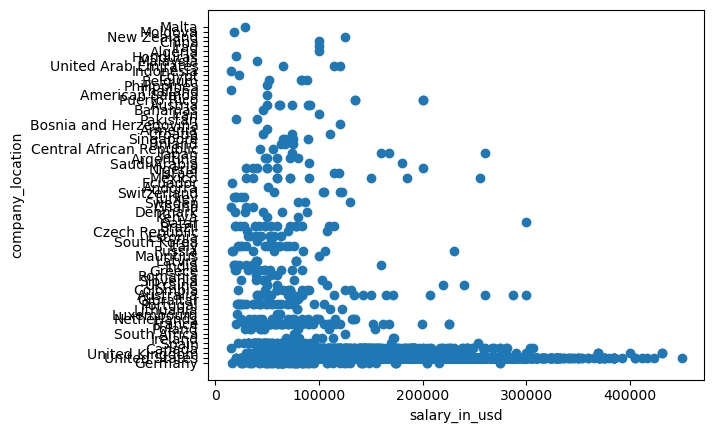

In [10]:
plt.ylabel('company_location')
plt.xlabel('salary_in_usd')

plt.scatter(df['salary_in_usd'],df['company_location'])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()

lm = reg.fit(df['work_year'],df['salary_in_usd'])

r_sq =  lm.score(df['work_year'],df['salary_in_usd'])

r_sq

ValueError: Expected 2D array, got 1D array instead:
array=[2023 2023 2023 ... 2021 2020 2020].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.